<a href="https://colab.research.google.com/github/SShalini24/Car-Price-Prediction-/blob/main/Project6_Car_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries 

In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

Data Collection and Processing 

In [6]:
# loading the data from csv file to a Pandas DataFrame 
car_dataset = pd.read_csv('/content/car data (1).csv')

In [7]:
# inspecting the first five rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
# inspecting the last five rows of the dataset
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [9]:
# checking the number of rows and columns 
car_dataset.shape

(301, 9)

In [10]:
#  geting some info about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
# checking the number of missing values 
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
# checking the distribution of the categorical data
print(car_dataset.Fuel_Type.value_counts())  # distributions of Fuel Type


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [15]:
print(car_dataset.Seller_Type.value_counts())     # distributions of Seller Type

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [16]:
print(car_dataset.Transmission.value_counts())     #  # distributions of Transmission

Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data 

In [19]:
# encoding the "Fuel Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [20]:
# encoding the "Seller Type" column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [21]:
# encoding the "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [22]:
# checking the above made changes 
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting Data into Training and Test Data

In [27]:
x = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset.Selling_Price

In [28]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [29]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test Data 

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state =2)

Model Training 

Linear Regression Model

In [32]:
# loading the Linear Regression Model
lin_reg_model = LinearRegression()

In [33]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation 

In [36]:
# prediction of the Training Data 
training_data_pred = lin_reg_model.predict(x_train)

# R Squared Error 
error_score = metrics.r2_score(y_train,training_data_pred)
print("R Squared Error",error_score)

R Squared Error 0.8799451660493711


Visualize the Actual Prize and Predicted Prize


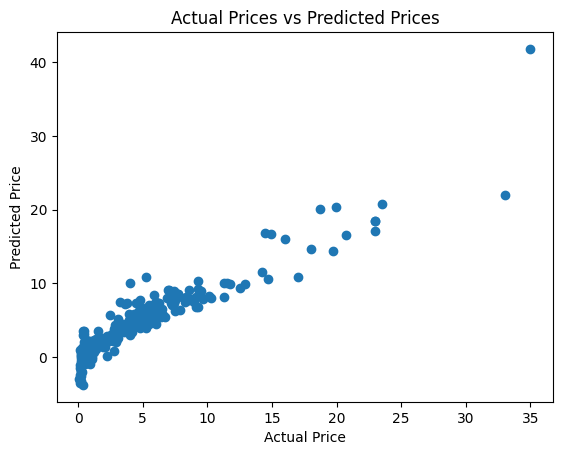

In [39]:
plt.scatter(y_train,training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [41]:
# Prediction on Test Data 
test_data_prediction = lin_reg_model.predict(x_test)

In [43]:
# R Squared Error 
error_rate = metrics.r2_score(y_test,test_data_prediction)
print("R2 score for test data",error_rate)

R2 score for test data 0.8365766715027051


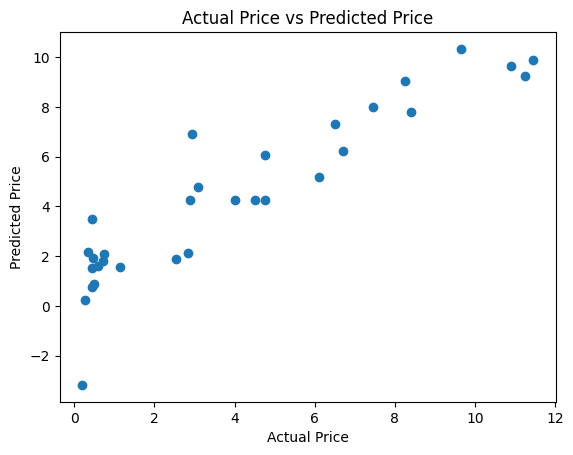

In [44]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

2. Lasso Regression 

In [48]:
# loading the Lasso Regression Model
lasso_reg_model = Lasso()

In [49]:
lasso_reg_model.fit(x_train,y_train)

Lasso()

Evaluation 

In [51]:
# prediction of training data 

training_data_pred = lasso_reg_model.predict(x_train)

In [53]:
# R Squared Error 
error_score = metrics.r2_score(y_train,training_data_pred)
print("R Squared Error for training data:",error_score)

R Squared Error for training data: 0.8427856123435794


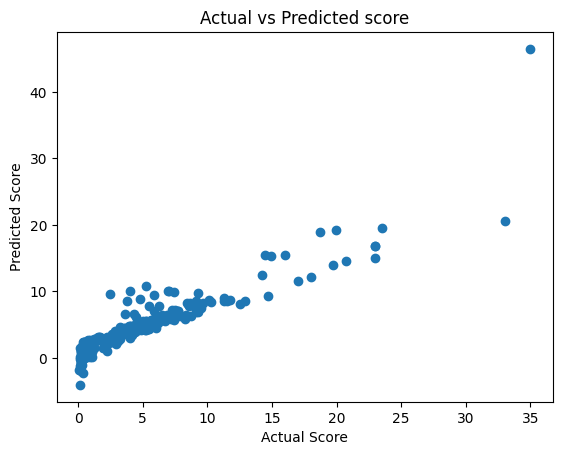

In [54]:
plt.scatter(y_train,training_data_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted score")
plt.show()

In [57]:
# prediction on testing data 
test_data_pred = lasso_reg_model.predict(x_test)

# R2 score on test data
error_score = metrics.r2_score(y_test,test_data_pred)
print("R2 score of Testing Data",error_score)

R2 score of Testing Data 0.8709167941173195


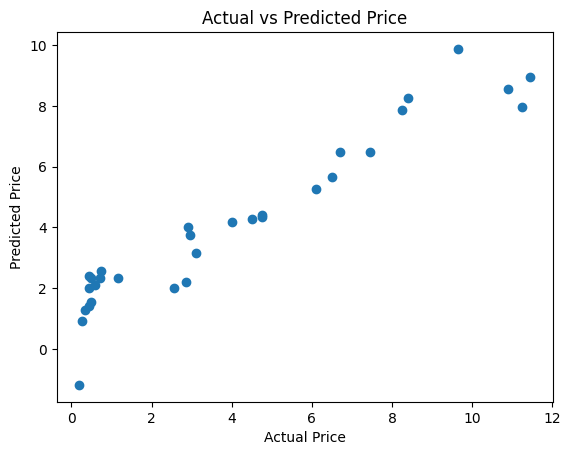

In [58]:
plt.scatter(y_test,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

Lasso model is Best Suited Model for the above data 

### As we can see that in Linear Regression the points are close but in the Lasso regression its much closer than the Linear.